In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from labs import *
from statistics import stdev

Цель работы: измерение количества подведенного тепла и вызванного им нагрева твердого тела; определение теплоемкости по экстраполяции отношения $\Delta Q / \Delta T$ к нулевым потерям тепла.
	
В работе используются: калориметр с нагревателем и термометром сопротивления; амперметр; вольтметр; мост постоянного тока; источник питания 36 В.



В данной работе теплоемкость определяется по формуле

$$C = \frac{\Delta Q}{\Delta T}$$


где $\Delta Q$ -- количество тепла, подведенного к телу, и $\Delta T$ -- изменение температуры тела, произошедшее в результате подвода тепла.

Температура исследуемого тела надежно измеряется термометром сопротивления, а определение количества тепла, поглощенного телом, обычно вызывает затруднение. В реальных условиях не вся энергия $P \Delta t$, выделенная нагревателем, идет на нагревание исследуемого тела и калориметра, часть ее уходит из калориметра благодаря теплопроводности его стенок. Оставшееся в калориметре количество тепла $\Delta Q$ равно 

$$\Delta Q = P\Delta t - \lambda(T - T_{\text{к}}) \Delta t$$

где $P$ -- мощность нагревателя, $\lambda$ -- коэффициент теплоотдачи стенок, $T$ -- температура тела, $T_{\text{к}}$ -- комнатная температура, $ \Delta t$ -- время, в течение которого идет нагревание.

Из уравнений (1) и (2) получаем

$$C = \frac{P - \lambda(T - T_{\text{к}})}{\Delta T / \Delta t}$$

Формула (3) является основной расчетной формулой. Она определяет теплоемкость тела вместе с калориметром. Теплоемкость калориметра измеряется отдельно и вычитается из результата.

С увеличением температуры исследуемого тела растет утечка энергии, связанная с теплопроводностью стенок калориметра. Из формулы (2) видноб что при постоянной мощности нагревателя по мере роста температуры количество теплаб передаваемое телу, уменьшается, и, следовательно, понижается скорость изменения его температуры.

Погрешности, связанные с утечкой тепла, оказываются небольшими, если не давать телу заметных перегревов и проводить все измерения при температурах, мало отличающихся от комнатной. Однако при небольших перегревах возникает большая ошибка при измерении $\Delta T = T - T_\text{к}$, и точность определения теплоемкости не возрастает. Чтобы избежать этой трудности, в работе используется следующая методика измерений. Зависимость скорости нагревания тела $\Delta T / \Delta t$ от температуры измеряется в широком интервале изменения температур. По полученным данным строится график

$$\frac{\Delta T}{\Delta t} = f(T)$$

Этот график экстраполируется к температуре $T = T_{\text{к}}$, и таким образом определяется скорость нагревания при комнатной температуре $(\Delta T / \Delta t)_{T_{\text{к}}}$. Подставляя полученное выражение в формулу (3) и замечая, что при $T = T_{\text{к}}$ член $\lambda(T - T_{\text{к}})$ обращается в ноль, получаем

$$ C = \frac{P}{(\Delta T / \Delta t)_{T_{\text{к}}}}$$




Температура измеряется термометром сопротивления, который представляет собой медную проволоку, намотанную на теплопроводящий каркас внутренней стенки калориметра Сопротивление проводника изменяется с температурой по закону


 $$R_{T} = R_{0}(1 + \alpha \Delta T)$$


где $R_{T}$ -- сопротивление термеметра про $T  ^{\circ}C$, $R_{0}$ -- его сопротивление при $0  ^{\circ}C$, $\alpha$ -- температурный коэффициент сопротивления. 

Дифференцируя (5) по времени, найдем


$$\frac{dR}{dt} = R_{0}\alpha \frac{dT}{dt}$$


Выразим сопротивление $R_{0}$ через исмеренное значение $R_{\text{к}}$ -- сопротивление термометра при комнатной температуре. Согласно (5), имеем


$$R_{0} = \frac{R_{\text{к}}}{1 + \alpha \Delta T_{\text{к}}}$$
   

Подставляя (6) и (7) в (4), найдем


$$C = \frac{PR_{\text{к}} \alpha}{(\frac{dR}{dt})_{T_{\text{к}}}(1 + \alpha \Delta T_{\text{к}})}$$

 


Зафиксируем параметры установки и образцов (напряжение и ток в термометре, мощность термометра, массы образцов):

$U = 36~\text{В}, I = 0,3~\text{А}, P = 10,8~\text{Вт}$

         

Также зафиксируем комнатную температуру $T_{\text{к}}$ и сопротивление термометра $R_{\text{к}}$ на момент начала снятия зависимости $R(t)$:


Пустой калориметр:    18,103  & 22,8 
Алюминиевый образец:   & 18,208 & 26   
Железный образец: & 18,071 & 24,4 


In [68]:
x1 = Value(17.05, 0.01)
y1 = Value(288, 0.2)
x2 = Value(18.5, 0.01)
y2 = Value(309, 0.2)

<ErrorbarContainer object of 3 artists>

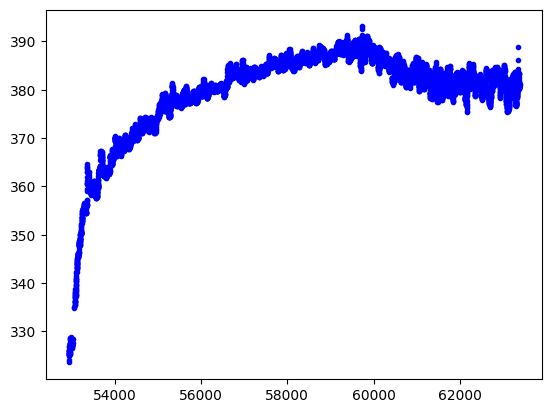

In [69]:
m = pd.read_csv("dataset1.csv")
m["tau"] = m["Time"].agg(lambda s: 60 * 60 * int(s[:2]) + 60 * int(s[5:7]) + int(s[10:12]))
m = m.drop(["Time", "Value_2ND", """DateTime : ( 23 / 02 / 06 -- 14 : 44 : 21 )""", " "], axis=1)

def convert_to_temp(r):
    return (r - x1) * ((y2 - y1) / (x2 - x1)) + y1
m["T1"] = m["Value"].agg(convert_to_temp)

p = pd.read_csv("dataset2.csv")
p["tau"] = p["Time"].agg(lambda s: 60 * 60 * int(s[:2]) + 60 * int(s[5:7]) + int(s[10:12]))
p = p.drop(["Time", "Value_2ND", """DateTime : ( 23 / 02 / 06 -- 14 : 44 : 21 )""", " "], axis=1)
p["T2"] = p["Value"].agg(convert_to_temp)
p = p.loc[p['T2'] < 308]
p

In [70]:
p = pd.read_csv("dataset2.csv")
p["tau"] = p["Time"].agg(lambda s: 60 * 60 * int(s[:2]) + 60 * int(s[5:7]) + int(s[10:12]))
p = p.drop(["Time", "Value_2ND", """DateTime : ( 23 / 02 / 06 -- 14 : 44 : 21 )""", " "], axis=1)
p["T2"] = p["Value"].agg(convert_to_temp)
p = p.loc[p['T2'] < 308]
p

,Value,tau,T2
0,17.687761,52933,(297.2±0.3)
1,17.687969,52934,(297.2±0.3)
2,17.687679,52935,(297.2±0.3)
3,17.687965,52936,(297.2±0.3)
4,17.688379,52937,(297.2±0.3)
...,...,...,...
10382,17.919117,63376,(300.6±0.3)
10383,17.918928,63377,(300.6±0.3)
10384,17.919008,63378,(300.6±0.3)
10385,17.919455,63379,(300.6±0.3)


In [71]:
data = [
    p[1200:2350],
    p[2350:3610],
    
    p[4000:5150],
    p[5150:6800],
    
    p[7200:8350],
    p[8350:],
]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


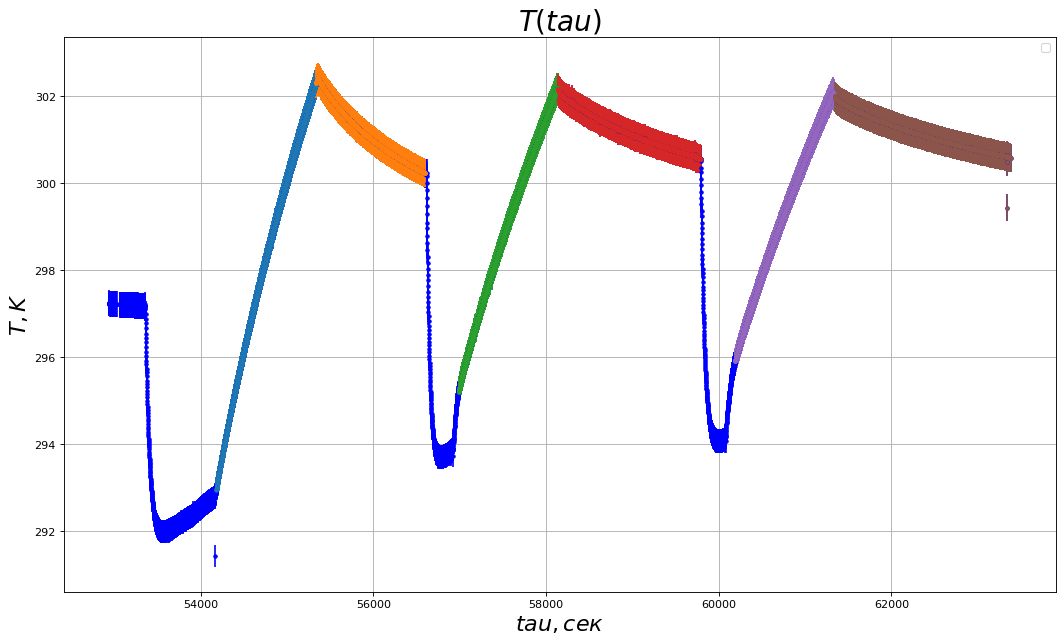

In [72]:
plt.figure(figsize=(16, 9), dpi=80)

plt.errorbar(x=p["tau"].agg(get_var), y=p["T2"].agg(get_var),
                 xerr=p["tau"].agg(get_err), yerr=p["T2"].agg(get_err), fmt='.', color="blue")

for dataset in data:
    plt.errorbar(x=dataset["tau"].agg(get_var), y=dataset["T2"].agg(get_var),
                 xerr=dataset["tau"].agg(get_err), yerr=dataset["T2"].agg(get_err), fmt='.')

plt.title(r"$T(tau)$", fontsize=25)
plt.xlabel(r"$tau, сек$", fontsize=20)
plt.ylabel(r"$T, K$", fontsize=20)
plt.grid(True)
plt.legend()

$$c=\frac{P}{A-B}$$

((0.00798±0.00002), (-139.2±0.9))

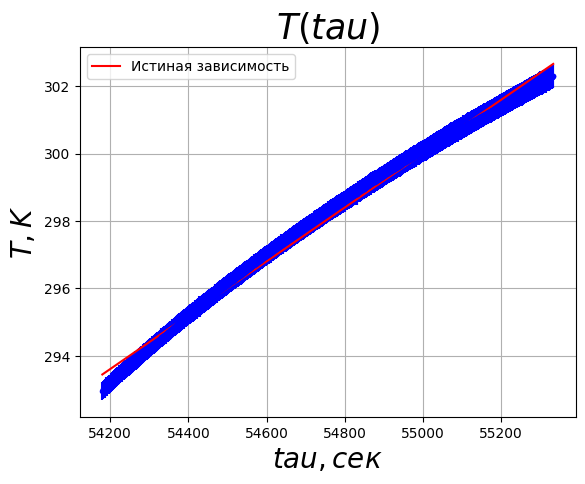

In [73]:
p_now = data[0]

def line(x, a, b):
    return a * x + b

params, cov = curve_fit(line, xdata=p_now["tau"].agg(get_var), ydata=p_now["T2"], )
k0 = Value(params[0], np.sqrt(cov[0][0]))
b = Value(params[1], np.sqrt(cov[1][1]))

plt.errorbar(x=p_now["tau"].agg(get_var), y=p_now["T2"].agg(get_var),
                xerr=p_now["tau"].agg(get_err), yerr=p_now["T2"].agg(get_err), fmt='.', color="blue")

plt.plot(p_now["tau"].agg(get_var), line(p_now["tau"].agg(get_var), params[0], params[1]), label="Истиная зависимость", color="red")

plt.title(r"$T(tau)$", fontsize=25)
plt.xlabel(r"$tau, сек$", fontsize=20)
plt.ylabel(r"$T, K$", fontsize=20)
plt.grid(True)
plt.legend()
k0, b

((-0.00169±0.00001), (395.6±0.4))

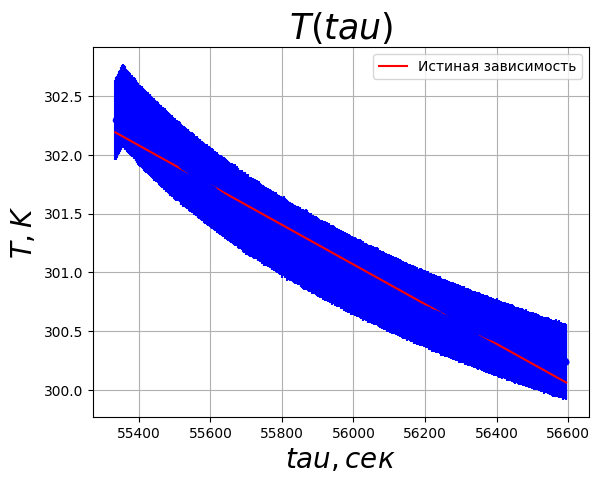

In [74]:
p_now = data[1]

def line(x, a, b):
    return a * x + b

params, cov = curve_fit(line, xdata=p_now["tau"].agg(get_var), ydata=p_now["T2"], )
k1 = Value(params[0], np.sqrt(cov[0][0]))
b = Value(params[1], np.sqrt(cov[1][1]))

plt.errorbar(x=p_now["tau"].agg(get_var), y=p_now["T2"].agg(get_var),
                xerr=p_now["tau"].agg(get_err), yerr=p_now["T2"].agg(get_err), fmt='.', color="blue")

plt.plot(p_now["tau"].agg(get_var), line(p_now["tau"].agg(get_var), params[0], params[1]), label="Истиная зависимость", color="red")

plt.title(r"$T(tau)$", fontsize=25)
plt.xlabel(r"$tau, сек$", fontsize=20)
plt.ylabel(r"$T, K$", fontsize=20)
plt.grid(True)
plt.legend()
k1, b

In [75]:
C0=6.14/(k0-k1)
print(C0)

(634.8±1.2)


$$c_{\text{калориметра}} = 634.8\pm1.2 \frac{\text{Дж}}{\text{К}}$$

((0.006±0.00001), (-46.1±0.6))

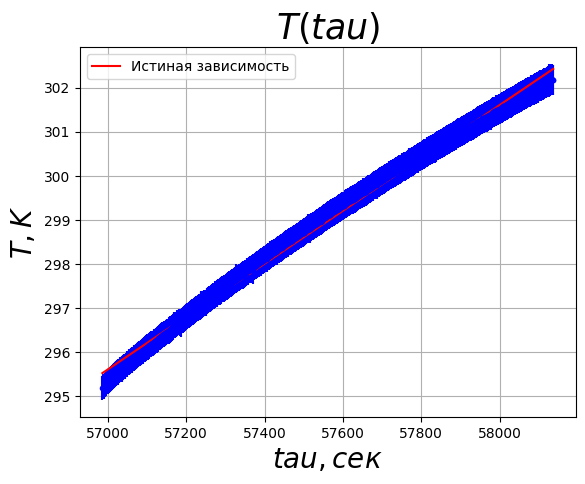

In [76]:
p_now = data[2]

def line(x, a, b):
    return a * x + b

params, cov = curve_fit(line, xdata=p_now["tau"].agg(get_var), ydata=p_now["T2"], )
k2 = Value(params[0], np.sqrt(cov[0][0]))
b = Value(params[1], np.sqrt(cov[1][1]))

plt.errorbar(x=p_now["tau"].agg(get_var), y=p_now["T2"].agg(get_var),
                xerr=p_now["tau"].agg(get_err), yerr=p_now["T2"].agg(get_err), fmt='.', color="blue")

plt.plot(p_now["tau"].agg(get_var), line(p_now["tau"].agg(get_var), params[0], params[1]), label="Истиная зависимость", color="red")

plt.title(r"$T(tau)$", fontsize=25)
plt.xlabel(r"$tau, сек$", fontsize=20)
plt.ylabel(r"$T, K$", fontsize=20)
plt.grid(True)
plt.legend()
k2, b

((-0.000885±0.000003), (353.4±0.2))

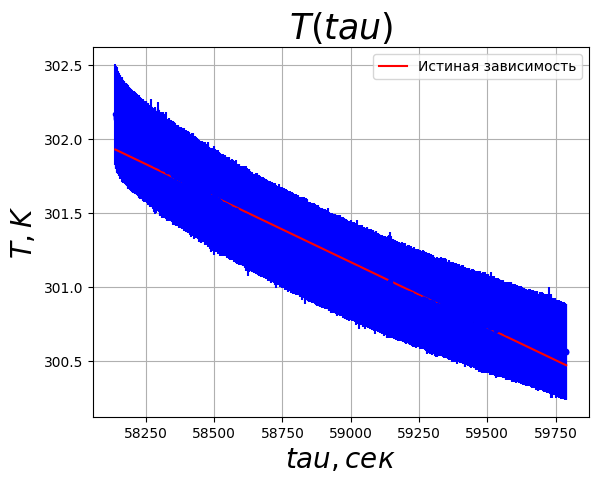

In [77]:
p_now = data[3]

def line(x, a, b):
    return a * x + b

params, cov = curve_fit(line, xdata=p_now["tau"].agg(get_var), ydata=p_now["T2"], )
k3 = Value(params[0], np.sqrt(cov[0][0]))
b = Value(params[1], np.sqrt(cov[1][1]))

plt.errorbar(x=p_now["tau"].agg(get_var), y=p_now["T2"].agg(get_var),
                xerr=p_now["tau"].agg(get_err), yerr=p_now["T2"].agg(get_err), fmt='.', color="blue")

plt.plot(p_now["tau"].agg(get_var), line(p_now["tau"].agg(get_var), params[0], params[1]), label="Истиная зависимость", color="red")

plt.title(r"$T(tau)$", fontsize=25)
plt.xlabel(r"$tau, сек$", fontsize=20)
plt.ylabel(r"$T, K$", fontsize=20)
plt.grid(True)
plt.legend()
k3, b

In [78]:
C1=6.14/(k2-k3)-C0
print(C1)

(257.7±1.8)


((0.00537±0.00001), (-26.9±0.5))

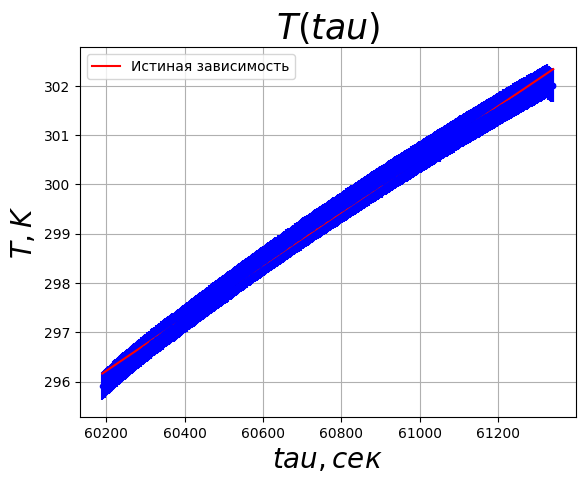

In [79]:
p_now = data[4]

def line(x, a, b):
    return a * x + b

params, cov = curve_fit(line, xdata=p_now["tau"].agg(get_var), ydata=p_now["T2"], )
k4 = Value(params[0], np.sqrt(cov[0][0]))
b = Value(params[1], np.sqrt(cov[1][1]))

plt.errorbar(x=p_now["tau"].agg(get_var), y=p_now["T2"].agg(get_var),
                xerr=p_now["tau"].agg(get_err), yerr=p_now["T2"].agg(get_err), fmt='.', color="blue")

plt.plot(p_now["tau"].agg(get_var), line(p_now["tau"].agg(get_var), params[0], params[1]), label="Истиная зависимость", color="red")

plt.title(r"$T(tau)$", fontsize=25)
plt.xlabel(r"$tau, сек$", fontsize=20)
plt.ylabel(r"$T, K$", fontsize=20)
plt.grid(True)
plt.legend()
k4, b

((-0.000634±0.000002), (340.7±0.1))

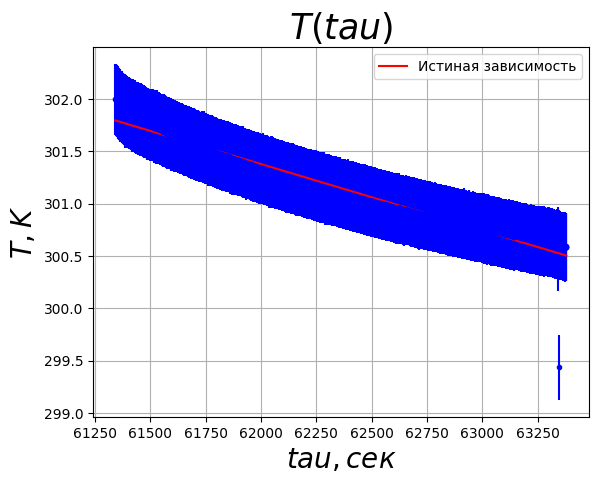

In [80]:
p_now = data[5]

def line(x, a, b):
    return a * x + b

params, cov = curve_fit(line, xdata=p_now["tau"].agg(get_var), ydata=p_now["T2"], )
k5 = Value(params[0], np.sqrt(cov[0][0]))
b = Value(params[1], np.sqrt(cov[1][1]))

plt.errorbar(x=p_now["tau"].agg(get_var), y=p_now["T2"].agg(get_var),
                xerr=p_now["tau"].agg(get_err), yerr=p_now["T2"].agg(get_err), fmt='.', color="blue")

plt.plot(p_now["tau"].agg(get_var), line(p_now["tau"].agg(get_var), params[0], params[1]), label="Истиная зависимость", color="red")

plt.title(r"$T(tau)$", fontsize=25)
plt.xlabel(r"$tau, сек$", fontsize=20)
plt.ylabel(r"$T, K$", fontsize=20)
plt.grid(True)
plt.legend()
k5, b

In [81]:
C2=6.14/(k4-k5)-C0
print(C2)

(388.5±1.8)


In [82]:
fe = Value(0.81512, 0.0001)
lat = Value(0.8755, 0.0001)

In [83]:
C11=C1/lat
print(C11)

(294.3±2.)


In [84]:
C22=C2/fe
print(C22)

(476.6±2.3)




Окончательно, $$c_{\text{железа}} = 443.7\pm2.1 \frac{\text{Дж}}{\text{кг}\cdot\text{К}}$$
$$c_{\text{латунь}} = 316.1\pm2.2 \frac{\text{Дж}}{\text{кг}\cdot\text{К}}$$